# GRADUATE ADMISSIONS FROM AN INDIAN PERSPECTIVE
# (Classification using Linear Regression)

In [1]:
# Importing dependencies:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Admissions.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


In [5]:
df.shape

(500, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [7]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [8]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [9]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [10]:
df = df.rename(columns={'LOR ': 'LOR', 'Chance of Admit ': 'Chance of Admit'})

In [11]:
df.duplicated().sum()

0

In [12]:
df.drop(columns=['Serial No.'], axis=1, inplace=True)

In [13]:
df.sample(3)

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
244,314,107,2,2.5,4.0,8.56,0,0.63
464,298,97,2,2.0,3.0,7.21,0,0.45
357,301,104,2,3.5,3.5,7.89,1,0.68


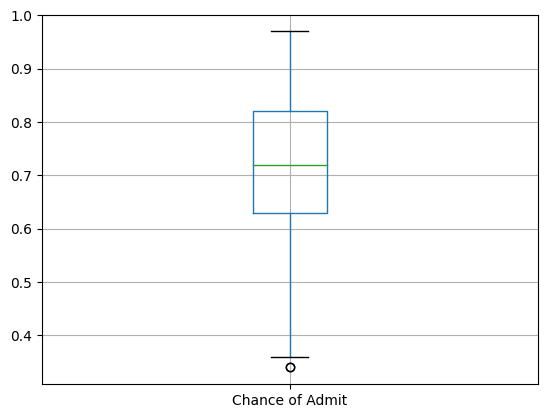

In [14]:
df.boxplot(column=['Chance of Admit'])
plt.show()

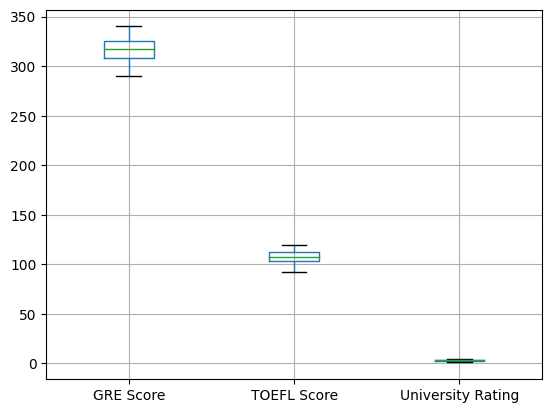

In [15]:
df.boxplot(column=['GRE Score', 'TOEFL Score', 'University Rating'])
plt.show()

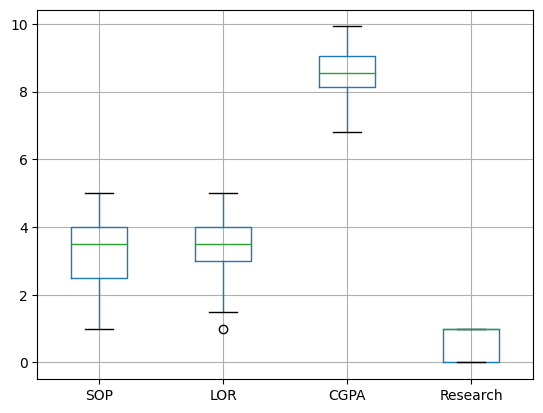

In [16]:
df.boxplot(column=['SOP', 'LOR', 'CGPA', 'Research'])
plt.show()

__From the above two boxplots, we can clearly observe that the columns "Chance of Admit" and "LOR" have outliers.__

# Inter Quartile Range (IQR):

In [17]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)

In [18]:
IQR = Q3-Q1
IQR

GRE Score            17.0000
TOEFL Score           9.0000
University Rating     2.0000
SOP                   1.5000
LOR                   1.0000
CGPA                  0.9125
Research              1.0000
Chance of Admit       0.1900
dtype: float64

In [19]:
# Upper Limit:
UL = Q3 + IQR*1.5
UL

GRE Score            350.50000
TOEFL Score          125.50000
University Rating      7.00000
SOP                    6.25000
LOR                    5.50000
CGPA                  10.40875
Research               2.50000
Chance of Admit        1.10500
dtype: float64

In [20]:
# Lower Limit:
LL = Q1 - IQR*1.5
LL

GRE Score            282.50000
TOEFL Score           89.50000
University Rating     -1.00000
SOP                    0.25000
LOR                    1.50000
CGPA                   6.75875
Research              -1.50000
Chance of Admit        0.34500
dtype: float64

# Handling Outliers:

In [21]:
dfOut_removed = df[(df>LL) & (df<UL)]
dfOut_removed

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1,0.87
496,337,117,5,5.0,5.0,9.87,1,0.96
497,330,120,5,4.5,5.0,9.56,1,0.93
498,312,103,4,4.0,5.0,8.43,0,0.73


In [22]:
dfOut_removed.isnull().sum()

GRE Score             0
TOEFL Score           0
University Rating     0
SOP                   0
LOR                  12
CGPA                  0
Research              0
Chance of Admit       2
dtype: int64

In [23]:
dfOut_removed.dropna(inplace=True)

In [24]:
dfOut_removed.shape

(486, 8)

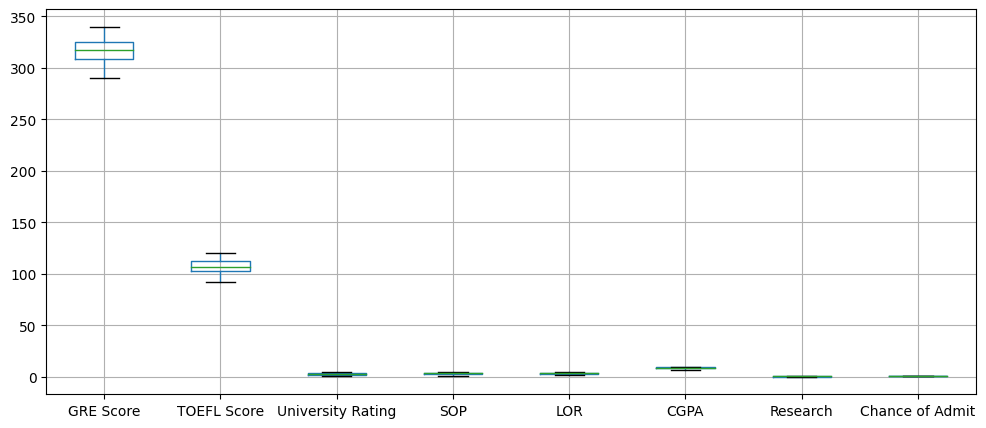

In [25]:
dfOut_removed.boxplot(figsize = (12,5), fontsize=10)
plt.show()

In [26]:
dfOut_removed.corr()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
GRE Score,1.000000,0.823522,0.622924,0.612628,0.509285,0.820842,0.557401,0.803190
TOEFL Score,0.823522,1.000000,0.637739,0.639901,0.518834,0.808109,0.460643,0.785730
University Rating,0.622924,0.637739,1.000000,0.719924,0.584528,0.693350,0.415942,0.678076
SOP,0.612628,0.639901,0.719924,1.000000,0.650051,0.709021,0.404728,0.686732
LOR,0.509285,0.518834,0.584528,0.650051,1.000000,0.626667,0.362204,0.629483
CGPA,0.820842,0.808109,0.693350,0.709021,0.626667,1.000000,0.490276,0.882150
Research,0.557401,0.460643,0.415942,0.404728,0.362204,0.490276,1.000000,0.539970
Chance of Admit,0.803190,0.785730,0.678076,0.686732,0.629483,0.882150,0.539970,1.000000


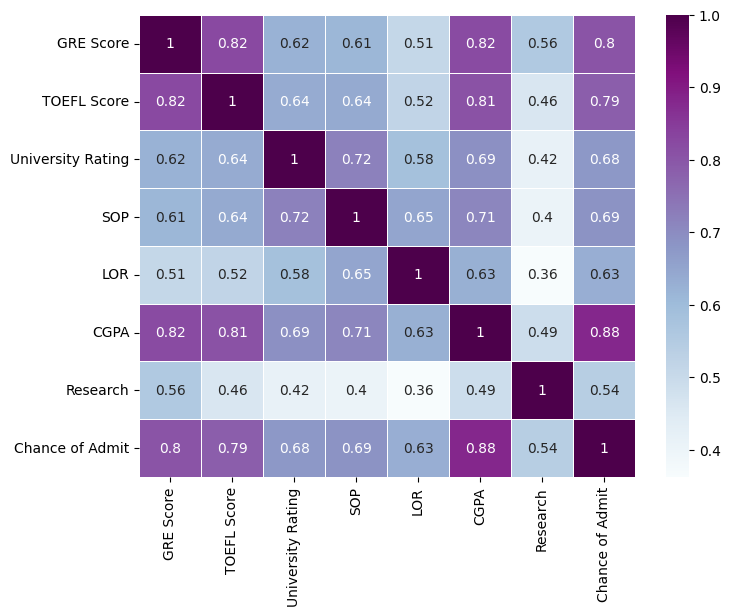

In [27]:
corr = dfOut_removed.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='BuPu', linewidths=.5)
plt.show()

# Univariate Analysis:

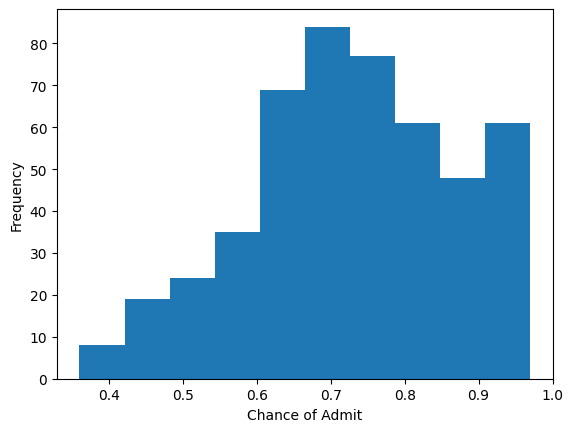

In [28]:
dfOut_removed['Chance of Admit'].plot.hist()
plt.xlabel('Chance of Admit')
plt.show()

__We can observe that it is not a normal distribution and there are variations that will be useful for predictions.__

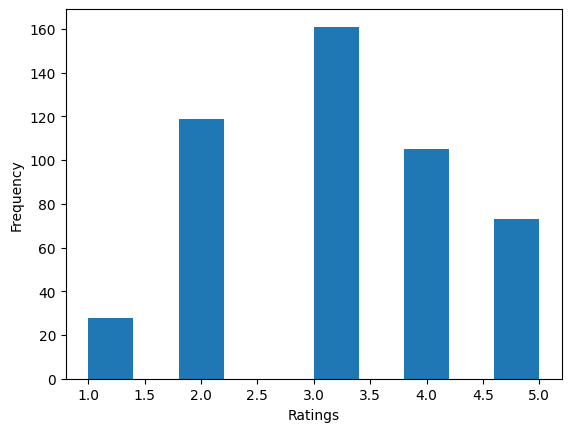

In [29]:
dfOut_removed['University Rating'].plot.hist()
plt.xlabel('Ratings')
plt.show()

__From the above histogram, we can see that the students of the Universities having ratings between 3 to 3.5 are getting admitted the most.__

In [30]:
dfOut_removed['Research'].value_counts()

Research
1    277
0    209
Name: count, dtype: int64

__Hence 277 students have experience in research whereas 209 students don't.__

# BiVariate Analysis:

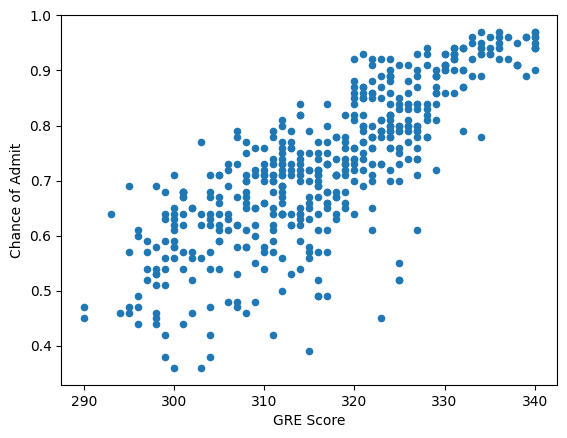

In [31]:
dfOut_removed.plot.scatter('GRE Score', 'Chance of Admit')
plt.show()

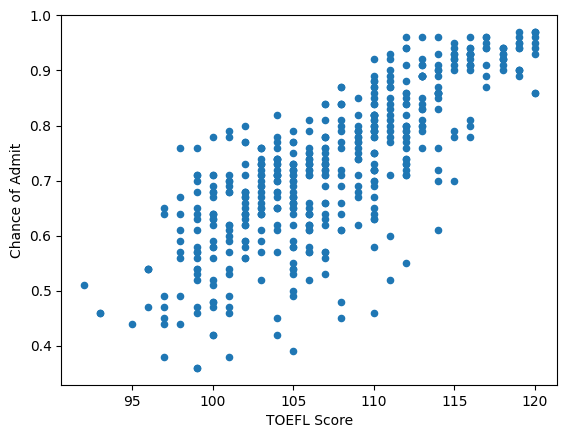

In [32]:
dfOut_removed.plot.scatter('TOEFL Score', 'Chance of Admit')
plt.show()

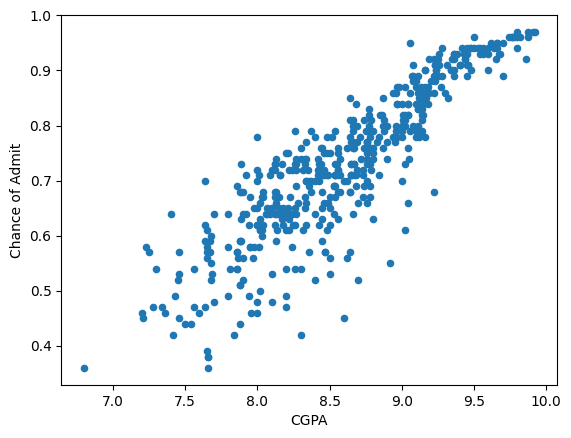

In [33]:
dfOut_removed.plot.scatter('CGPA', 'Chance of Admit')
plt.show()

# Train and Test Split:

In [34]:
X = dfOut_removed.drop(columns=['Chance of Admit'], axis=1)
Y = dfOut_removed['Chance of Admit']

In [35]:
X.shape

(486, 7)

In [36]:
Y.shape

(486,)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=70)

# Model Training:

In [39]:
from sklearn.linear_model import LinearRegression

In [40]:
model = LinearRegression()

In [41]:
model.fit(X_train, Y_train)

LinearRegression()

# Model  Evaluation:

In [42]:
Y_pred = model.predict(X_test)

In [43]:
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(Y_test, Y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')

# Calculate R-squared (R2)
r2 = r2_score(Y_test, Y_pred)
print(f'R-squared (R2): {r2:.2f}')

Mean Squared Error (MSE): 0.00
R-squared (R2): 0.78


# Model Building:

In [45]:
def predict_admission_chance(gre, toefl, university_rating, sop, lor, cgpa, research):
    user_data = np.array([gre, toefl, university_rating, sop, lor, cgpa, research]).reshape(1, -1)
    prediction = model.predict(user_data)
    print(prediction[0])

    if prediction[0] >= 0.8:
        return "HIGH CHANCES OF ADMIT"
    elif 0.6 <= prediction[0] < 0.8:
        return "MODERATE CHANCES OF ADMIT"
    else:
        return "LOW CHANCES OF ADMIT"

In [46]:
result = predict_admission_chance(337,118,4,4.5,4.5,9.65,1)
print(result)

0.9506666031269835
HIGH CHANCES OF ADMIT


In [47]:
result = predict_admission_chance(314,103,2,2,3,8.21,0)
print(result)

0.630149066849079
MODERATE CHANCES OF ADMIT


In [48]:
result = predict_admission_chance(300,99,1,3,2,6.8,1)
print(result)

0.43724944483121453
LOW CHANCES OF ADMIT


# Exporting pickle for streamlit:

In [49]:
import pickle
pickle.dump(model,open('model.pkl','wb'))